## Problem: Dimentionality Reduction   
## Methodology: Principle Component Analysis 


#### PCA is of the most populatr techniques and the first one to try when we face performance problems or uninformative information because of a large number of features. One can view PCA as an entry into the model-based feature engineering techniques. It also differs from frequency-based filtering where we for example “elimiante all counts that are smaller than a threshold". That kind of filtering procedure is carried out without further input from the data itself. However, in model-based techniques, we require information from the data. For example, PCA is defined around the principal axes of the data. In filtering techniques we have a clear-cut line between data, features, and models. But in model-base technique the difference gets increasingly blurry. PCA focuses on the notion of linear dependency between the features. PCA helps to identify and elimiate wasted space and computation power by reducing uninformative information.

With help of PCA we replace redundant features with a few new features that adequately summarize information contained in the original feature space. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA


In [5]:
# We load the MNIST OCR dataset below
mnist_OCR = fetch_openml('mnist_784', version=1, cache=True)

In [7]:
# We randomly sample 10000 images from MNIST for the sake of decreasing the computation time.
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist_OCR.data[indices] / 255.0 # Divide by 255 to normalize for RGB (Red, Green, Blue) in image data
y = mnist_OCR.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [9]:
# As you see, the size of each image is 784. In fact, all images in MNIST are 28 by 28 pixels and 784 is just the result of the multiplication of 28 by 28. So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side.

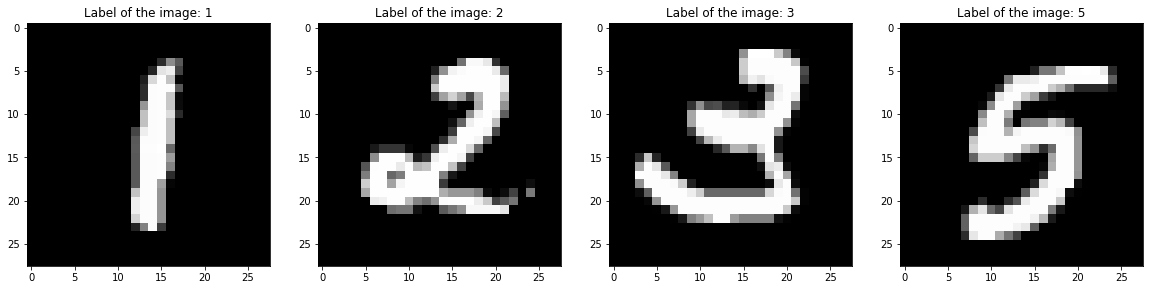

In [11]:
# Inspect few of them
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[126]))

plt.show()

In [13]:
# Normalize the data
from sklearn.preprocessing import normalize 
X_norm = normalize(X)
# Apply PCA and visualize the MNIST data in two-dimentional space
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_norm)

In [15]:
pca.explained_variance_ratio_

array([0.09324959, 0.07308927])

In [17]:
# Now, visualize the dataset in two-dimentional space using the first two components of the PCA. In the graph below, we set the colors of the data points and also label them according to their digits. Note that if you run the following cell, you'll notice that it takes some time to plot the graph. This is not related to PCA at all. It's because we go over each of the 10000 data points to label them with their digits.

In [19]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 5}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### The graph above reveals how the two-dimensional representations of the ten digits spread along the two axis. Most notably, zeros (0s) and ones (1s) occupy the right-most and the left-most regions of the graph respectively. We also see a fair amount of overlap between numbers, making it difficult to tell them apart using a linear classifier in the projected space. Hence, if the task is to classify the handwritten digits and the chosen model is a linear classifier, then the first two principal components are not sufficient as features.

# Try different dataset: Fashion MNIST
## This image dataset comprises 70,000 grayscale 28x28 images. The dataset contains the following 10 classes:
### T-shirt/top, Trouser/pants, Pullover shirt, Dress, Coat, Sandal, Shirt, Sneaker, Bag and Ankle boot.

In [21]:
from sklearn.datasets import fetch_openml
mnist_fashion = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [23]:
# We randomly sample 10000 images from MNIST for the sake of decreasing the computation time.
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist_fashion.data[indices] / 255.0 # Divide by 255 to normalize for RGB (Red, Green, Blue) in image data
y = mnist_fashion.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


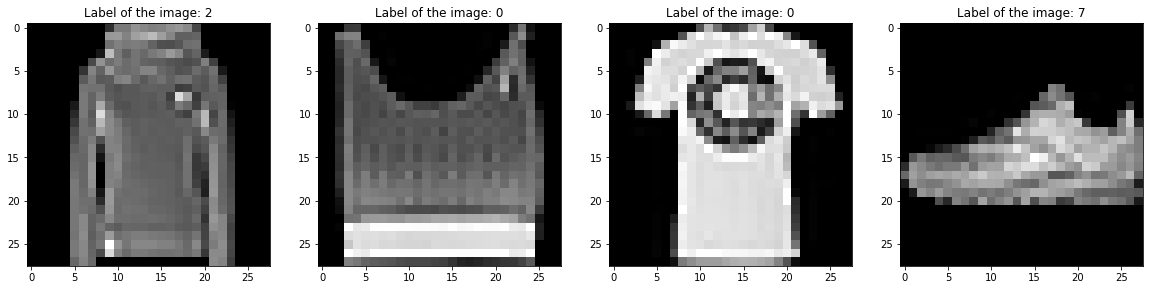

In [25]:
# Inspect few of them
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[126]))

plt.show()

In [38]:
X_norm = normalize(X)
# Apply PCA and visualize the MNIST data in two-dimentional space
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_norm)

In [39]:
# Percentage of explained variance
pca.explained_variance_ratio_

array([0.2610724 , 0.11052851])

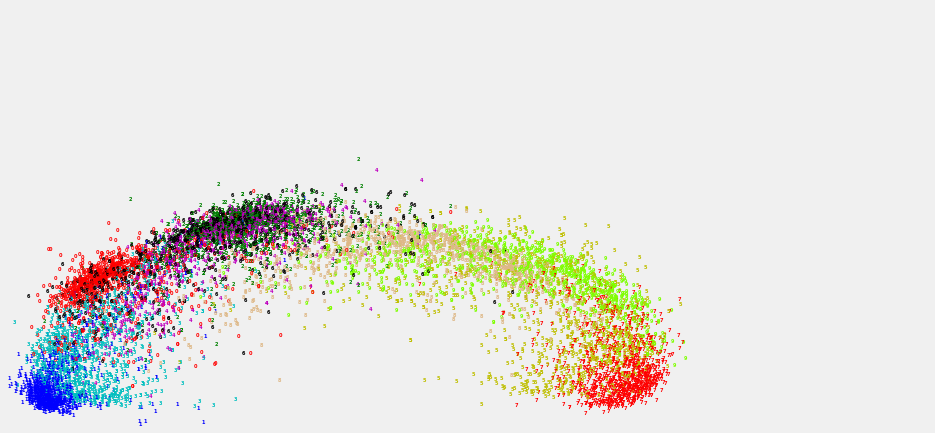

In [31]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 5}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### There are many overlapping but we can still observe certain clustering of pixels. Next we will use seaborn to recrate the principal images

Text(0.5, 0.98, '2-Component PCA')

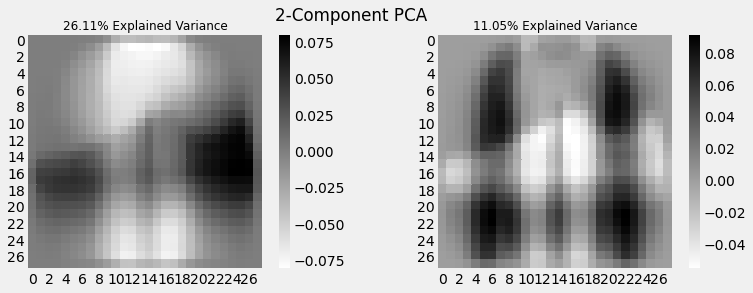

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

### Do the same for 3rd and 4th PCA

In [35]:
X_norm = normalize(X)
pca = PCA(n_components=4)
pca_components = pca.fit_transform(X_norm)

######
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('3rd and 4th-Component PCA')

Text(0.5, 0.98, '3rd and 4th-Component PCA')

### The higher the number of PCA the more of the total variance we can explain but with an decreasing rate. We need to find a "cutoff" in the effectiveness of the model. And for that we plot the explained variance ratio (out of all variance) for each of the components of the PCA. 

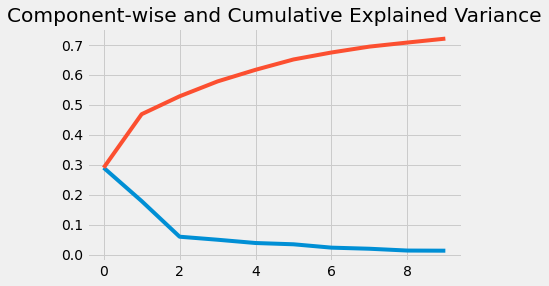

In [36]:
import numpy as np

pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)

plt.plot(range(10), pca.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass